In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
palette=sns.diverging_palette(30, 250, s=80, l=65, center="light", as_cmap=True)
sns.set_theme()

In [47]:
filename='D:/Python/retail_sales_dataset.csv'
retail=pd.read_csv(filename,parse_dates=['Date'])
retail = retail[['Date', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']]
retail.info()
retail.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.8+ KB


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [48]:
retail['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [49]:
retail['Date_year_month']=retail['Date'].dt.strftime('%Y-%m')
retail.info()
retail.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
 7   Date_year_month   1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 62.6+ KB


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Date_year_month
0,2023-11-24,Male,34,Beauty,3,50,150,2023-11
1,2023-02-27,Female,26,Clothing,2,500,1000,2023-02
2,2023-01-13,Male,50,Electronics,1,30,30,2023-01
3,2023-05-21,Male,37,Clothing,1,500,500,2023-05
4,2023-05-06,Male,30,Beauty,2,50,100,2023-05


Text(0, 0.5, 'Number of Customers')

<Figure size 1000x600 with 0 Axes>

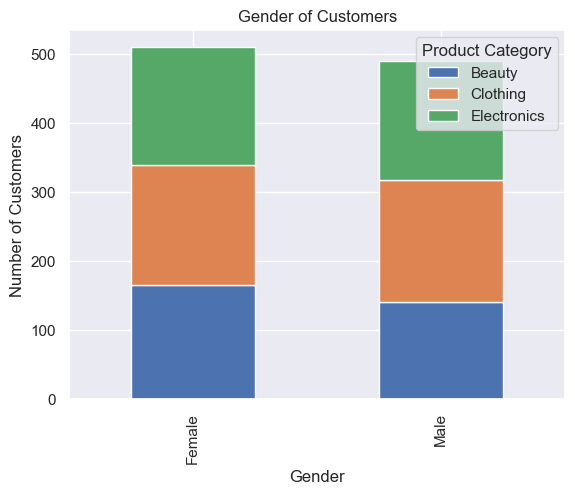

In [50]:
df_plot = retail.groupby(['Product Category', 'Gender']).size().reset_index().pivot(columns='Product Category', index='Gender', values=0)
plt.figure(figsize=(10, 6))
df_plot.plot(kind='bar', stacked=True)
plt.title('Gender of Customers')
plt.ylabel('Number of Customers')

In [58]:
# Find the most popular Product Category in each male and female group : I like 'Clothing', too
male_favorite_category = retail[retail['Gender'] == 'Male']['Product Category'].mode().values[0]
female_favorite_category = retail[retail['Gender'] == 'Female']['Product Category'].mode().values[0]

print(f"[Men] Most Popular Product Category: {male_favorite_category}")
print(f"[Women] Most Popular Product Category: {female_favorite_category}")

[Men] Most Popular Product Category: Clothing
[Women] Most Popular Product Category: Clothing


Text(0.5, 1.0, "Distribution Of Customers' Ages")

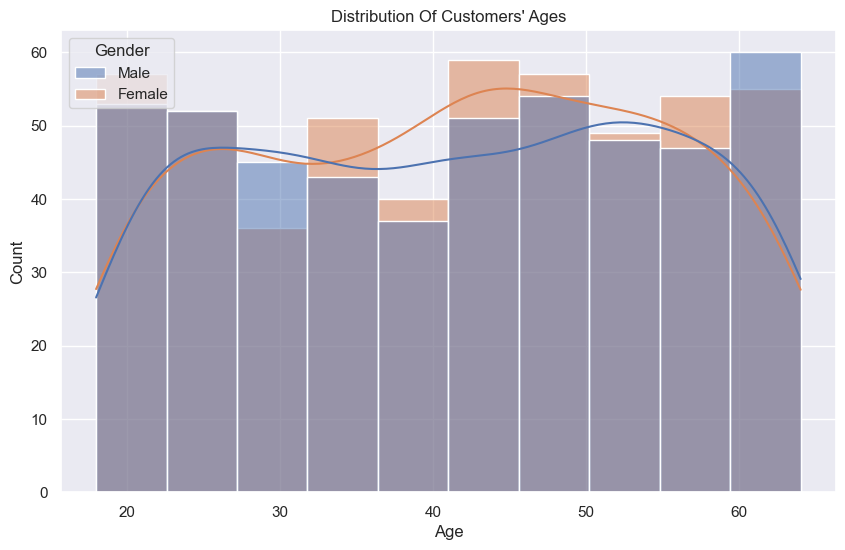

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=retail,x='Age',hue="Gender", kde=True, bins=10)
plt.title("Distribution Of Customers' Ages")

Text(0.5, 1.0, "Distribution Of Customers' Ages")

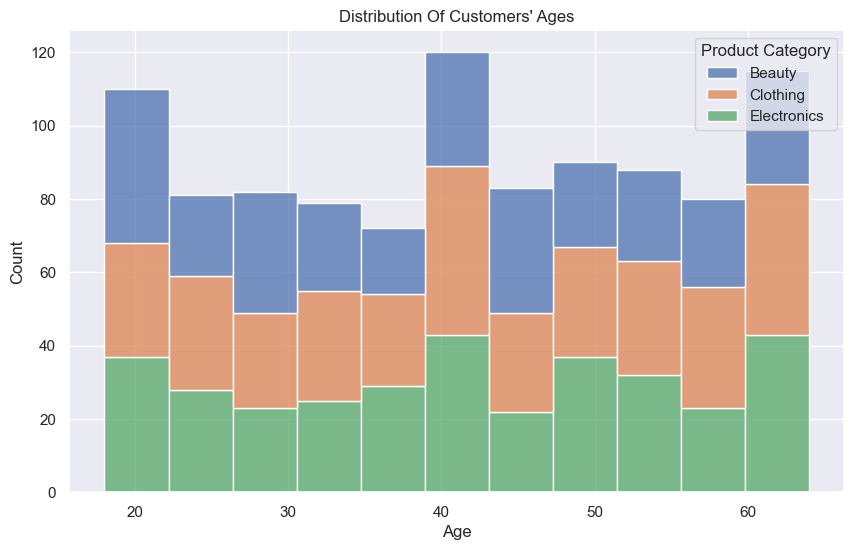

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=retail,x='Age',hue="Product Category",multiple="stack")
plt.title("Distribution Of Customers' Ages")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

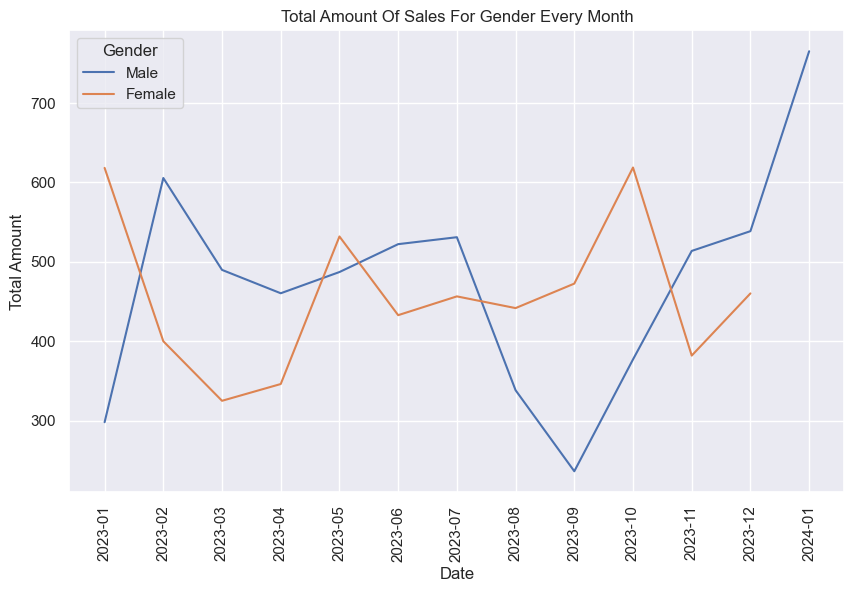

In [53]:
retail_sorted=retail.sort_values('Date_year_month')
plt.figure(figsize=(10, 6))
sns.lineplot(data=retail_sorted,x='Date_year_month',y='Total Amount',hue='Gender',errorbar=None)
plt.title('Total Amount Of Sales For Gender Every Month')
plt.xlabel('Date')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

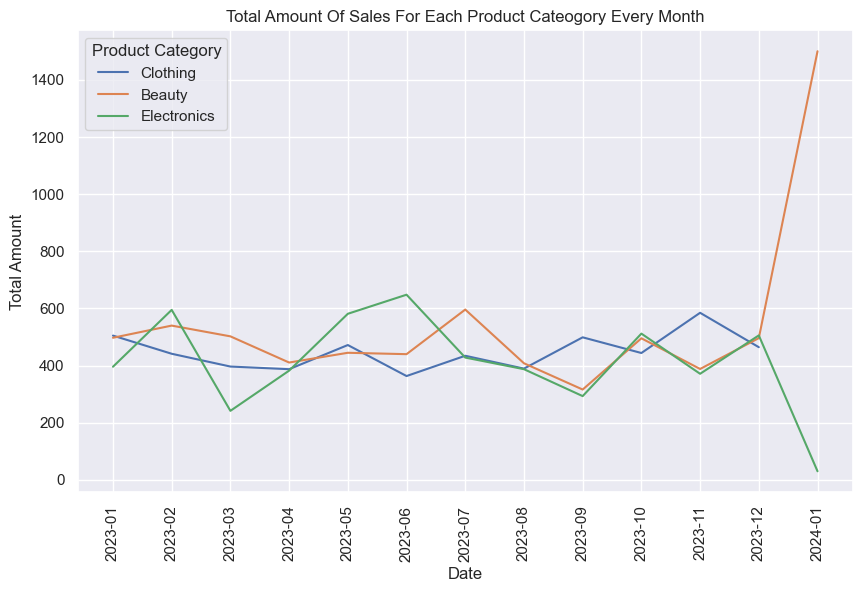

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=retail_sorted,x='Date_year_month',y='Total Amount',hue='Product Category',errorbar=None)
plt.title('Total Amount Of Sales For Each Product Cateogory Every Month')
plt.xlabel('Date')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

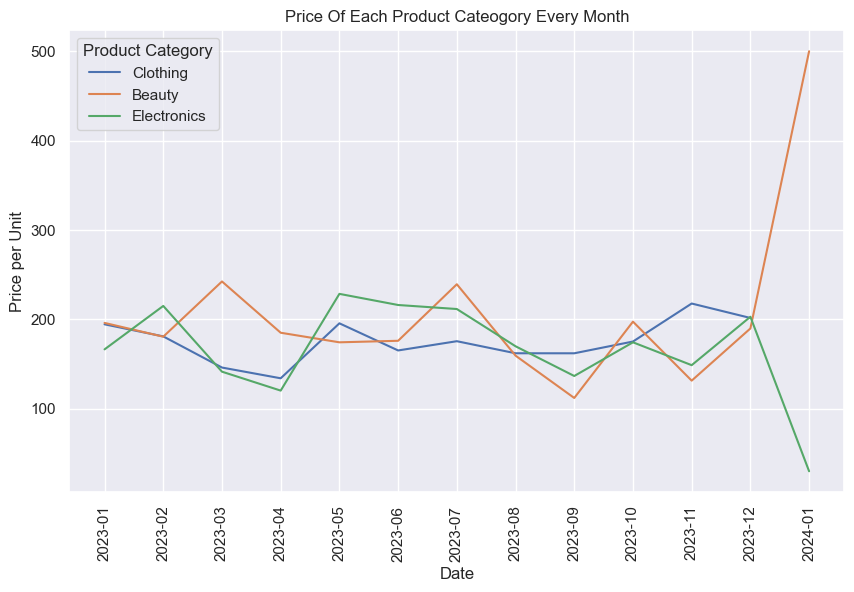

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=retail_sorted,x='Date_year_month',y='Price per Unit',hue='Product Category',errorbar=None)
plt.title('Price Of Each Product Cateogory Every Month')
plt.xlabel('Date')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

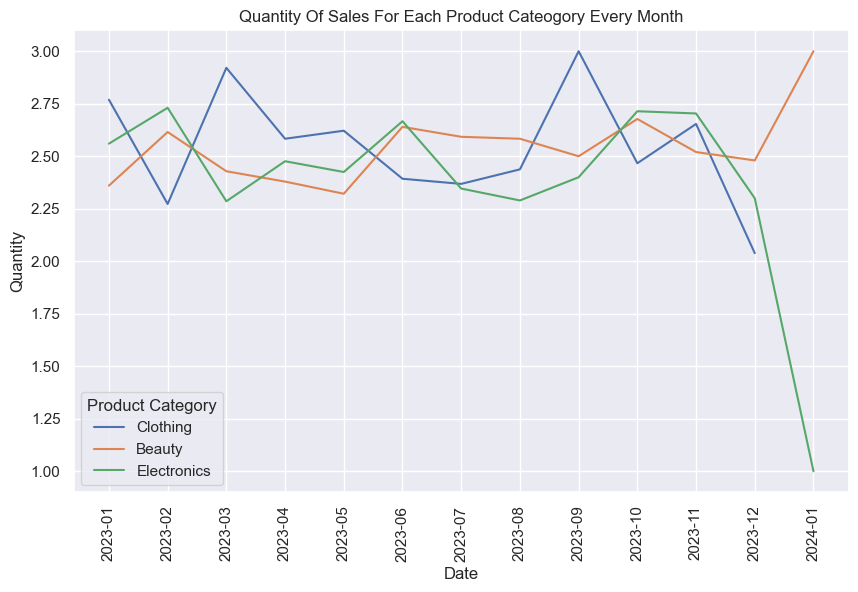

In [56]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=retail_sorted,x='Date_year_month',y='Quantity',hue='Product Category',errorbar=None)
plt.title('Quantity Of Sales For Each Product Cateogory Every Month')
plt.xlabel('Date')
plt.xticks(rotation=90)

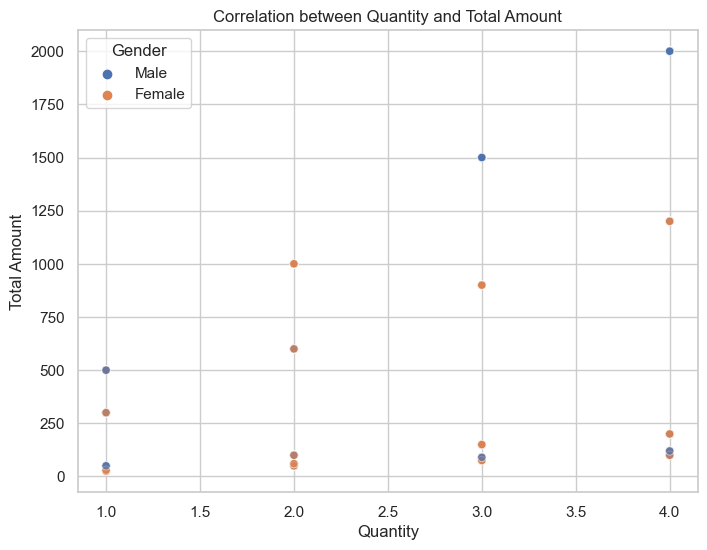

Correlation coefficient between Quantity and Total Amount: 0.37370705412140603


In [60]:
# This plot shows linearity of `Quantity` & `Total Amount`
# Set Seaborn style
sns.set(style="whitegrid")

# Create a scatterplot to visualize the correlation between Age and Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=retail, x='Quantity', y='Total Amount', hue='Gender', alpha=0.7)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Correlation between Quantity and Total Amount')
plt.legend(title='Gender')

plt.show()

# Calculate the correlation coefficient between Age and Quantity
correlation_coefficient = retail['Quantity'].corr(retail['Total Amount'])

print(f"Correlation coefficient between Quantity and Total Amount: {correlation_coefficient}")

C:\Users\murad_asal\AppData\Local\Temp\ipykernel_10796\350131730.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = retail.corr()


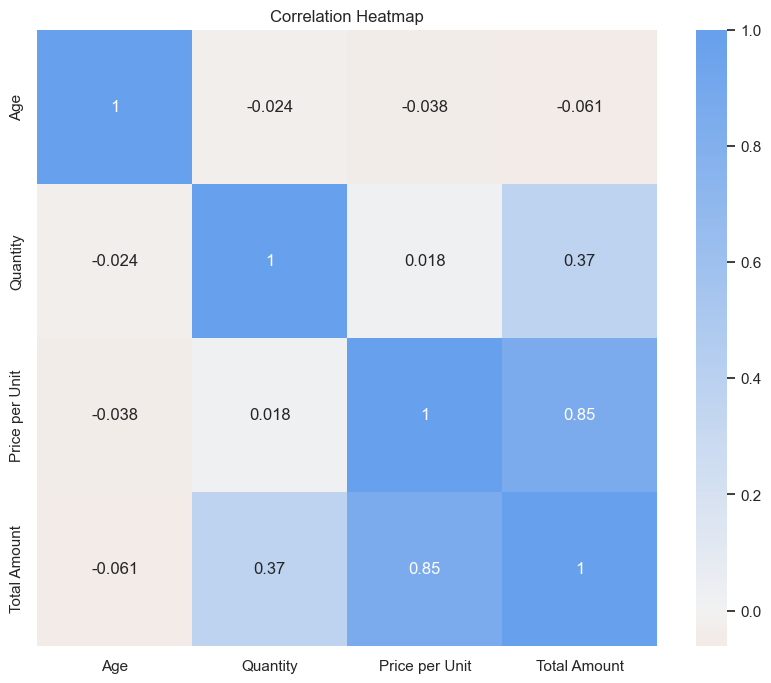

In [61]:
# Calculate correlation matrix
correlation_matrix = retail.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=palette, center=0)
plt.title('Correlation Heatmap')
plt.show()

